## Exercise 5. Regularization of Linear Regression and Bias-Variance Trade-off
(with Python, _from scratch_)

---
This notebook follows the one in [Matlab_track](https://github.com/jhonsen/machinelearn_NG/tree/master/Matlab_track) which focuses on doing __Regularization on a linear regression model__, i.e., defining cost regularized function and plotting training and validation errors


#### To do list:
- [ ] The minimization didn't reach convergence. So, the polynomial model isn't fitting well with the dataset.

---

### Section 1.1. Visualizing the dataset
This dataset is divided into three parts:  
- A training set that your model will learn on: X, y
- A cross validation set for determining the regularization parameter:
Xval, yval
- A test set for evaluating performance. These are "unseen" examples
which your model did not see during training: Xtest, ytest

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

from yellowbrick.model_selection import LearningCurve
from sklearn.linear_model import LinearRegression
from scipy.io import loadmat
from scipy.optimize import fmin_cg
from scipy.optimize import minimize
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [46]:
data = loadmat('../Matlab_track/ex5/ex5data1.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'Xtest', 'ytest', 'Xval', 'yval'])

In [47]:
y = data['y']
X = data['X']

y_val = data['yval']
X_val = data['Xval']

X_test = data['Xtest']
y_test = data['ytest']

print('X:', X.shape)
print('y:', y.shape)
print('Xval:', X_val.shape)
print('yval:', y_val.shape)
print('Xtest:' , X_test.shape)
print('ytest:', y_test.shape)

X: (12, 1)
y: (12, 1)
Xval: (21, 1)
yval: (21, 1)
Xtest: (21, 1)
ytest: (21, 1)


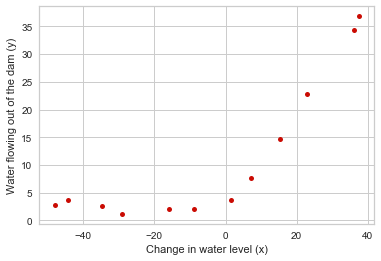

In [48]:
plt.figure()
plt.plot(X, y,'r.',markersize=10, linewidth=1.5)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.show()

### Section 1.2. Regularized linear regression cost function

Recall that the cost function and gradient are:  
  
  
- [x] Write the cost function and partial derivative for $\theta$, define __linearRegCostFunction__

In [86]:
def linearRegCostFunction(theta, X,y,lamd):
    m = X.shape[0]
    
    # hypothesis function
    h = X.dot(theta)        #<-- size: (12x2).(2x1)= (12x1)
    
    # cost function
    J = (1/(2*m)) * np.sum(np.square(h-y)) #<-- sum(--12x1)--) is scalar
    
    # Apply Regularization
    J = J + (lamd/(2*m)) * np.sum( np.square(theta[1:]) )  #<-- scalar + scalar

    return J

In [87]:
def gradRegCostFunction(theta,X,y, lamd):
    m = X.shape[0]
    
    # hypothesis function
    h = X.dot(theta).reshape(-1,1)        #<-- size: (12x2).(2x1)= (12x1)
    
    # derivative
    grad = (1/m) * X.T @ (h-y)    #<-- grad is  (2x12).(12x1) = (2x1)
    
    grad = grad + (lamd/m)*np.r_[[[0]],theta[1:].reshape(-1,1)]  #<-- (2x1) + scalar x (2x1)
    
    return grad.flatten()

In [51]:
# Calculate cost function and gradient
theta = np.array([[1],[1]])
J = linearRegCostFunction(theta, np.c_[np.ones_like(X), X], y, 1)
grad = gradRegCostFunction(theta, np.c_[np.ones_like(X), X], y, 1)
print('Cost at theta = [1 ; 1]: %s (which should be about 303.993192)\n' %J)
print('Gradient at theta = [1; 1] is:\n%s \n(which should be about\n[-15.303016; 598.250744])\n' %(grad))

Cost at theta = [1 ; 1]: 303.9931922202643 (which should be about 303.993192)

Gradient at theta = [1; 1] is:
[-15.30301567 598.25074417] 
(which should be about
[-15.303016; 598.250744])



### Section 1.3. Fitting Linear Regression  
In this part, we set regularization parameter $\theta$ to zero. Because our current implementation of linear regression is trying to fit a 2-dimensional $\theta$, regularization will not be incredibly helpful for a $\theta$ of such low dimension.  
The best fit line tells us that the model is not a good fit to the data because the data has a non-linear pattern. While visualizing the best fit as shown is one possible way to debug your learning algorithm, it is not always easy to visualize the data and model.  
- [x] Training LR model on the dataset using function __trainLinearReg__, which finds theta parameters
- [x] Plot the best fit line on the dataset 

#### Try scipy's optimize.minimize module

In [91]:
def trainLinearReg(X, y, reg):
#     initial_theta = np.array( [[1],[1]] )
    initial_theta = (np.ones((X.shape[1],1))*15)
    # For some reason the minimize() function does not converge when using
    # zeros as initial theta.
        
    res = minimize(linearRegCostFunction, initial_theta, args=(X,y,reg), method=None, jac=gradRegCostFunction,
                   options={'maxiter':5000})
    
    return(res)

In [92]:
fit = trainLinearReg(np.c_[np.ones_like(X), X], y, 0)
print(fit)

      fun: 1604.4002999186634
 hess_inv: array([[1.03142187, 0.00617881],
       [0.00617881, 0.001215  ]])
      jac: array([ 3.42437788e-12, -5.70374113e-10])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([13.08790351,  0.36777923])


#### Try scipy's optimize.fmin_cg module, to follow the method in [MATLAB](https://github.com/jhonsen/machinelearn_NG/tree/master/Matlab_track)  track


In [93]:
def trainLinearReg(X, y, lamda):
    
    #initial_theta = np.asarray([[0],[0]])
    #For some reason the minimize() function does not converge when using
    # zeros as initial theta.
    
#     initial_theta = np.array([[15],[15]])
    initial_theta = (np.ones((X.shape[1],1))*15)
    
    res = fmin_cg(f=linearRegCostFunction, 
                        x0=initial_theta, 
                      args =( X, y, lamda),   
                      fprime=gradRegCostFunction,
                         maxiter=5000)
              
    return res

In [94]:
lamda = 0
theta_opt = trainLinearReg(np.c_[np.ones_like(X), X], y, lamda)
theta_opt

         Current function value: 1604.438977
         Iterations: 4
         Function evaluations: 21
         Gradient evaluations: 10


array([13.08975938,  0.36778987])

In [95]:
# Calculate best fit values (line)
fitJ = np.c_[np.ones_like(X), X] @ theta_opt
fitJ

array([ 7.22838115,  2.36758888, 26.39990884, 26.87900617, -4.58579136,
        9.80118171, 18.71981057,  0.32514632, 13.60067629, -3.23413798,
       15.66925442, 21.4616679 ])

### Visualize dataset with the best fit line

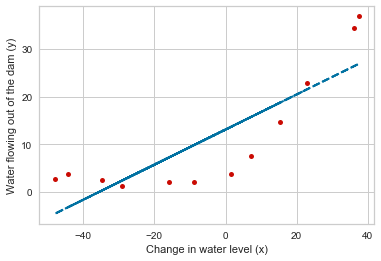

In [96]:
plt.figure()
plt.plot(X,y, 'r.',markersize=10, linewidth=1.5)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')

plt.plot(X, fitJ, '--', linewidth=2)

plt.show()


### Section 2. Bias-Variance  
Models with high bias are not complex enough for the data and tend to underfit, while models with high variance overfit to the training data.  

### Section 2.1. Learning Curves
You will now implement code to generate the learning curves that will be useful in debugging learning algorithms. Recall that a learning curve plots training and cross validation error as a function of training set size. 
- [x] Define __learningCurve__, which returns a vector of errors for the training set and cross validation set.  
- [x] Split X into training and cross-validation sets 
- [x] Find theta parameters using __trainLinearReg__ 
- [x] Compute error on the training and cross validation sets, by defining __linearRegCostFunction__ with lambda =0 (no regularization). Then, Store them into _errortrain_ and _errorval_
- [x] plot the learning curve, using training- and cross-validation set errors.  


In [97]:
def learningCurve(X, y, Xval, yval, lamda):
    m = X.shape[0]
    
    error_train = np.zeros((m,1))
    error_val = np.zeros((m,1))
    
    for i in range(m):
        X_sub = X[:i+1, :]
        y_sub = y[:i+1]
        
        theta = trainLinearReg(X_sub, y_sub, lamda)
        
        error_train[i] = linearRegCostFunction(theta, X_sub, y_sub,0)
        error_val[i] = linearRegCostFunction(theta, Xval, yval,0)               
   
    return error_train, error_val

In [98]:
lamd = 0
error_train, error_val = learningCurve(np.c_[np.ones_like(X),X], y,
                                      np.c_[np.ones_like(X_val), X_val],
                                       y_val,
                                       lamd)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 4
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 0.461812
         Iterations: 2
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 703.694232
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 1140.492066
         Iterations: 1
         Function evaluations: 96
         Gradient evaluations: 84
         Current function value: 1282.995119
         Iterations: 1
         Function evaluations: 54
         Gradient evaluations: 43
         Current function value: 1383.631241
         Iterations: 1
         Function evaluations: 90
         Gradient evaluations: 78
Optimization terminated successfully.
         Current function value: 1365.425393


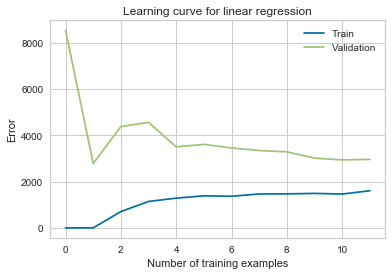

In [99]:
# Plot learning curves
plt.figure()
plt.plot(range(X.shape[0]), error_train, label='Train')
plt.plot(range(X.shape[0]), error_val, label='Validation')
plt.title('Learning curve for linear regression')
plt.xlabel('Number of training examples')
plt.ylabel('Error')

plt.legend()
plt.show()

/anaconda3/envs/temp/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


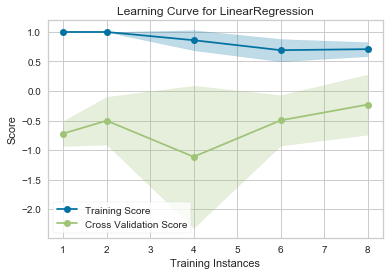

In [100]:
viz = LearningCurve(LinearRegression(),  scoring='r2')
viz.fit(X, y)
viz.poof()

In [62]:
# Print out training and validation errors
pd.DataFrame(np.c_[error_train, error_val], columns=['Training_error','Validation_error'])

,Training_error,Validation_error
0,6.037806e-24,8535.691205
1,4.618122e-01,2778.992416
2,7.036942e+02,4375.516616
3,1.140492e+03,4554.546297
4,1.282995e+03,3497.989746
5,1.383631e+03,3605.047588
6,1.365425e+03,3450.749266
7,1.463456e+03,3340.370767
8,1.467431e+03,3281.661817
9,1.488020e+03,3011.568950


### Section 3. Polynomial Regression  
For use of polynomial Regression, the hypothesis has the form: 
$$h_\theta(x) = \theta_0 + \theta_1*(waterLevel) + \theta_2*(waterLevel)^2 + ... + \theta_p*(waterLevel)^p$$
$$h_\theta(x) = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_px_p$$


Notice that by defining x1 = (waterLevel); x2 = (waterLevel)2; ...; xp =(waterLevel)p, we obtain a linear regression model where the features are the various powers of the original value (waterLevel).
- [x] Complete the code in __polyFeatures__, so that the function maps original X (mx1) into its higher power

In [101]:
def polyFeatures(X, p):
    
    X_poly= np.zeros((X.shape[0], p))
    
    for i in range(p):
        X_poly[:,i] = np.power(X[:,0], i+1)           
    
    return X_poly

In [102]:
# Testing the fucntion with polynomial degree 8
p = 8 

# Map X onto Polynomial Features 
X_poly = polyFeatures(X, p)
X_val_poly = polyFeatures(X_val, p)
X_test_poly = polyFeatures(X_test, p)

In [103]:
# Feature normalize the datasets
from sklearn.preprocessing import StandardScaler
in_sets = [X_poly, X_val_poly, X_test_poly]
out_sets_name = ['X_poly_sc','X_poly_val_sc','X_poly_test_sc']

for ind, each in enumerate(in_sets):
    scaler = StandardScaler()
    scaler.fit(each)
    X_sc = scaler.transform(each)
    
    print(out_sets_name[ind])
    print('Mean of each column:\n ', X_sc.mean(axis=0))
    print('Standard Deviation of each column:\n ', X_sc.std(axis=0),'\n')
    
    # Create variables within this loop
    # This method may not be recommeded (coding-standards wise)
    globals()[out_sets_name[ind]] = X_sc
    
    

X_poly_sc
Mean of each column:
  [-8.32667268e-17  2.26670534e-16 -9.25185854e-18  0.00000000e+00
  6.47630098e-17  3.70074342e-17 -1.85037171e-17  1.01770444e-16]
Standard Deviation of each column:
  [1. 1. 1. 1. 1. 1. 1. 1.] 

X_poly_val_sc
Mean of each column:
  [-5.28677631e-18 -2.43191710e-16  3.17206578e-17  6.87280920e-17
  6.34413157e-17 -1.58603289e-16  7.93016446e-18 -5.81545394e-17]
Standard Deviation of each column:
  [1. 1. 1. 1. 1. 1. 1. 1.] 

X_poly_test_sc
Mean of each column:
  [-6.60847038e-17 -3.54214013e-16  4.49375986e-17 -1.58603289e-16
  2.64338815e-18  8.45884209e-17  1.58603289e-17  4.75809868e-17]
Standard Deviation of each column:
  [1. 1. 1. 1. 1. 1. 1. 1.] 



Next: 
- [x] Plot the training data and best fit line  
- [x] Plot the learning curves

In [104]:
X_poly_sc = np.c_[np.ones((X_poly_sc.shape[0],1)), X_poly_sc]
X_poly_val_sc = np.c_[np.ones((X_poly_val_sc.shape[0],1)), X_poly_val_sc]
X_poly_test_sc = np.c_[np.ones((X_poly_test_sc.shape[0],1)), X_poly_test_sc]

In [105]:
X_poly_sc.shape, X_poly_val_sc.shape, X_poly_test_sc.shape

((12, 9), (21, 9), (21, 9))

In [106]:
print('Normalized Training example:\n')
print(X_poly_sc[0,:].reshape(-1,1))

Normalized Training example:

[[ 1.        ]
 [-0.3782437 ]
 [-0.78866232]
 [ 0.19032872]
 [-0.7375913 ]
 [ 0.32025197]
 [-0.6171516 ]
 [ 0.35983501]
 [-0.53109126]]


In [107]:
lamd =0
theta = trainLinearReg(X_poly_sc, y, lamd)
theta.reshape(-1,1).tolist()

         Current function value: 1799.004553
         Iterations: 5
         Function evaluations: 106
         Gradient evaluations: 94


[[11.781785491835603],
 [9.929055028676725],
 [1.8259292244903877],
 [-0.5266443234444202],
 [1.4575096936108283],
 [2.645807573623159],
 [4.454096113208353],
 [7.694752791895338],
 [6.8416227574369195]]

In [108]:
def polyfit(X,p):
    x = np.arange(X.min()-15, X.max()+25, 0.05 ).reshape(-1,1)
    x_poly = polyFeatures(x, p)
    x_poly = np.c_[np.ones((x_poly.shape[0],1)), x_poly]
    
    return x, x_poly

In [109]:
polyfit(X,8)[1].shape, polyfit(X,8)[0].shape

((2512, 9), (2512, 1))

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 4
         Gradient evaluations: 4
         Current function value: 0.364509
         Iterations: 1
         Function evaluations: 88
         Gradient evaluations: 76
         Current function value: 710.308958
         Iterations: 2
         Function evaluations: 93
         Gradient evaluations: 81
         Current function value: 1155.817683
         Iterations: 4
         Function evaluations: 102
         Gradient evaluations: 90
         Current function value: 1364.422985
         Iterations: 5
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 1518.505298
         Iterations: 3
         Function evaluations: 109
         Gradient evaluations: 97
         Current function value: 1516.193763
         Iterations: 3
         Function evaluations: 96
         Gradient evaluations: 84
         Current 

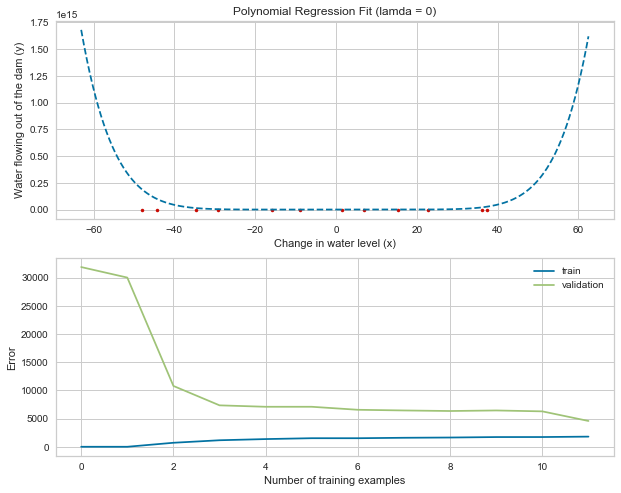

In [110]:
fig, axes = plt.subplots(2,1, figsize=(10,8))
axes[0].plot(X, y, 'r.')
temp = polyfit(X,8)

axes[0].plot(temp[0], temp[1] @ theta.reshape(-1,1), '--')
axes[0].set_xlabel('Change in water level (x)')
axes[0].set_ylabel('Water flowing out of the dam (y)')
axes[0].set_title('Polynomial Regression Fit (lamda = %s)' %lamd)

error_train, error_val = learningCurve(X_poly_sc, y, X_poly_val_sc, y_val,
                                       lamd)
axes[1].plot(range(X_poly_sc.shape[0]), error_train, label='train')
axes[1].plot(range(X_poly_sc.shape[0]), error_val, label = 'validation')
axes[1].set_xlabel('Number of training examples')
axes[1].set_ylabel('Error')
axes[1].legend()
plt.show()


### Section 3.2. Adjusting the regularization parameter  
Try to plot diffferent lambdas:__0,1,100__

         Current function value: 1799.004553
         Iterations: 5
         Function evaluations: 106
         Gradient evaluations: 94
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 4
         Gradient evaluations: 4
         Current function value: 0.364509
         Iterations: 1
         Function evaluations: 88
         Gradient evaluations: 76
         Current function value: 710.308958
         Iterations: 2
         Function evaluations: 93
         Gradient evaluations: 81
         Current function value: 1155.817683
         Iterations: 4
         Function evaluations: 102
         Gradient evaluations: 90
         Current function value: 1364.422985
         Iterations: 5
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 1518.505298
         Iterations: 3
         Function evaluations: 109
         Gradient evaluations: 97
         Current

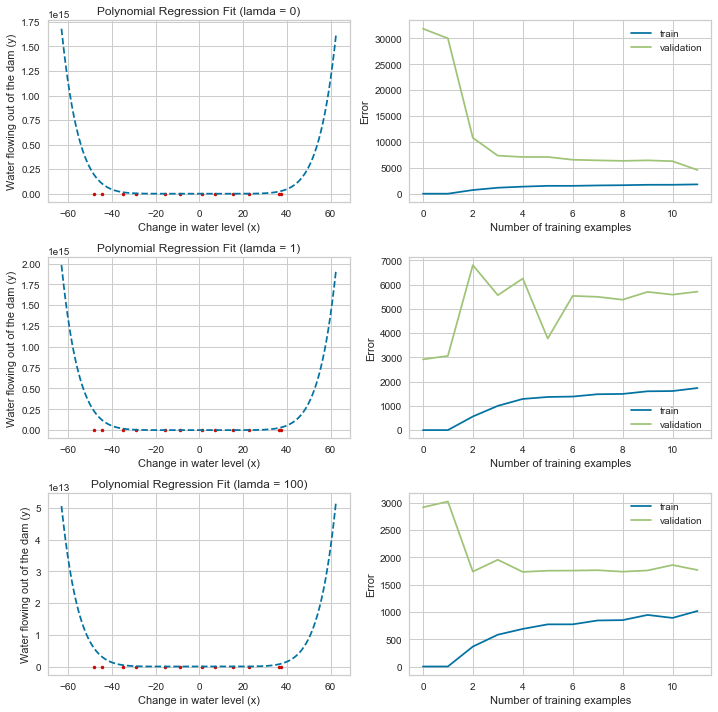

In [80]:
lamd_list = [0,1,100]

fig, axes = plt.subplots(3,2, figsize=(10,10))

for ind, each in enumerate(lamd_list):
    
    
    theta = trainLinearReg(X_poly_sc, y, each)
    axes[ind,0].plot(X, y, 'r.')
    temp = polyfit(X,8)
    axes[ind,0].plot(temp[0], temp[1] @ theta.reshape(-1,1), '--')
    axes[ind,0].set_xlabel('Change in water level (x)')
    axes[ind,0].set_ylabel('Water flowing out of the dam (y)')
    axes[ind,0].set_title('Polynomial Regression Fit (lamda = %s)' %each)
    
    kk =1
    error_train, error_val = learningCurve(X_poly_sc, 
                                           y, 
                                           X_poly_val_sc,
                                           y_val,
                                           each)
    axes[ind,1].plot(range(X_poly_sc.shape[0]), error_train, label='train')
    axes[ind,1].plot(range(X_poly_sc.shape[0]), error_val, label = 'validation')
    axes[ind,1].set_xlabel('Number of training examples')
    axes[ind,1].set_ylabel('Error')
    axes[ind,1].legend()
    
plt.tight_layout()
plt.show()


### Using Scikit 

In [11]:
poly = PolynomialFeatures(degree=8)
X_train_poly = poly.fit_transform(X[:,0].reshape(-1,1))

reg = LinearRegression()
reg.fit(X_train_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

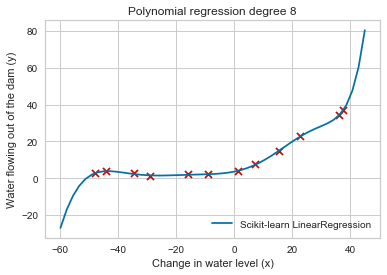

In [14]:
# plot range for x
x_vec = np.linspace(-60,45)

# using coefficients to calculate y
y_vec = reg.intercept_+ np.sum(reg.coef_*poly.fit_transform(x_vec.reshape(-1,1)), axis=1)
# plot_y2 = regr3.intercept_ + np.sum(regr3.coef_*poly.fit_transform(plot_x.reshape(-1,1)), axis=1)

plt.plot(x_vec, y_vec, label='Scikit-learn LinearRegression')
# plt.plot(plot_x, plot_y2, label='Scikit-learn Ridge (alpha={})'.format(regr3.alpha))
plt.scatter(X[:,0], y, s=50, c='r', marker='x', linewidths=1)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.title('Polynomial regression degree 8')
plt.legend(loc=4);

In [ ]:

regr3 = Ridge(alpha=20)
regr3.fit(X_train_poly, y_train)


### Section 3.4. Computing test set error

you should compute the test error using the best value of $\lambda$ you found for $\lambda$ = 3.


In [111]:
error_train,error_test = learningCurve(X_poly_sc, y, X_poly_test_sc, y_test, 3)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 19
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 0.249042
         Iterations: 6
         Function evaluations: 116
         Gradient evaluations: 104
         Current function value: 499.591726
         Iterations: 2
         Function evaluations: 47
         Gradient evaluations: 36
         Current function value: 886.893879
         Iterations: 3
         Function evaluations: 110
         Gradient evaluations: 98
         Current function value: 981.161617
         Iterations: 5
         Function evaluations: 130
         Gradient evaluations: 118
         Current function value: 1240.528241
         Iterations: 3
         Function evaluations: 109
         Gradient evaluations: 97
         Current function value: 1235.848258
         Iterations: 4
         Function evaluations: 116
         Gradient evaluations: 104
         C

In [113]:
print('for lambda=3, the test error is: %f' %error_test[-1])

for lambda=3, the test error is: 2693.570691
